In [1]:
!pip3 install --user --upgrade -e git+https://github.com/twintproject/twint.git@origin/master#egg=twint

Obtaining twint from git+https://github.com/twintproject/twint.git@origin/master#egg=twint
  Cloning https://github.com/twintproject/twint.git (to revision origin/master) to ./src/twint
  Running command git clone -q https://github.com/twintproject/twint.git /content/src/twint
  Running command git checkout -q origin/master
     |████████████████████████████████| 1.3MB 8.6MB/s 
     |████████████████████████████████| 266kB 25.5MB/s 
     |████████████████████████████████| 327kB 25.6MB/s 
     |████████████████████████████████| 296kB 27.6MB/s 
     |████████████████████████████████| 143kB 29.5MB/s 
     |████████████████████████████████| 235kB 34.6MB/s 
     |████████████████████████████████| 81kB 9.4MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp36-none-any.whl size=13485 sha256=e80dee5cced787573b22cbc20fc1563d7f52b5d469e588b5bab7c2e1c544428b
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
  Created 

In [1]:
!pip install nest_asyncio

In [2]:
import twint

In [3]:
import nest_asyncio
nest_asyncio.apply()

In [16]:
#configuration
c = twint.Config()
c.Username = "moneycontrolcom"
c.Search = "reliance"
c.Limit = 20000
c.count = True
c.Since = "2015-01-01"
c.pandas = True
c.Store_csv = True
c.Output = "reliance_tweet.csv"

In [17]:
#running search
twint.run.Search(c)

1331051157062606849 2020-11-24 01:45:00 +0000 <moneycontrolcom> Reliance Retail Ltd showcased more than 40,000 artisan-crafted products, from over 50 GI clusters, this festive season  #RelianceRetail #FestiveSeason #VocalForLocal   https://t.co/nSQNymXBUE
1330874464645435392 2020-11-23 14:02:53 +0000 <moneycontrolcom> Aiming to boost the income of local artisans under 'Vocal for Local' mission, Reliance Retail Ltd showcased more than 40,000 artisan-crafted products this festive season.  #Reliance #RelianceRetail #VocalForLocal    https://t.co/nSQNymG0w4
1330725105651990528 2020-11-23 04:09:23 +0000 <moneycontrolcom> #MarketsWithMC: RIL share price jumped over 3% today after CCI approved Future Group-Reliance Retail deal.   #RIL #Reliance #StockMarket #StocksToWatch    https://t.co/H8DPn45MTH
1330113032274538504 2020-11-21 11:37:13 +0000 <moneycontrolcom> Reliance's Managing Director and Chairman Mukesh Ambani said India has entered a crucial phase in its fight against COVID-19, and tha

In [19]:
import pandas as pd
df = pd.read_csv("reliance_tweet.csv")

In [21]:
df = df[["date", "tweet"]]

In [22]:
print("Head: \n", df.head())
print("Tail: \n", df.tail())

Head: 
          date                                              tweet
0  2020-11-24  Reliance Retail Ltd showcased more than 40,000...
1  2020-11-23  Aiming to boost the income of local artisans u...
2  2020-11-23  #MarketsWithMC: RIL share price jumped over 3%...
3  2020-11-21  Reliance's Managing Director and Chairman Muke...
4  2020-11-21  RIL Chairman Mukesh Ambani spoke at the 8th Co...
Tail: 
             date                                              tweet
1273  2015-02-04  #Applicants list payments bank AB Nuvo, Airtel...
1274  2015-01-20  How Reliance Life Insurance uses tech to impro...
1275  2015-01-16  #Reliance Industry, Alok Agarwal CFO: Took mea...
1276  2015-01-16  #Reliance Industry, Alok Agarwal CFO: This was...
1277  2015-01-16  #Reliance Industry CFO: Satisfied with Q3 numbers


In [27]:
df.drop_duplicates()
print(len(df))

1278


In [28]:
#convert date column as date
df['date'] = pd.to_datetime(df['date'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1278 non-null   datetime64[ns]
 1   tweet   1278 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 20.1+ KB
None


In [29]:
#merging twitter text if multiples for a single date
df = df.groupby('date').agg({'tweet': ', '.join}).reset_index() 

In [30]:
print(df.head())
print(df.tail())
print("Length of dataset:", len(df))

        date                                              tweet
0 2015-01-16  #Reliance Industry, Alok Agarwal CFO: Took mea...
1 2015-01-20  How Reliance Life Insurance uses tech to impro...
2 2015-02-04  #Applicants list payments bank AB Nuvo, Airtel...
3 2015-03-27  Nifty breaches 8300; Reliance, Bharti, Idea fa...
4 2015-04-20  Global cues negative; can #Reliance Q4 nos lif...
          date                                              tweet
568 2020-11-19  RIL has said it has completed the sale of abou...
569 2020-11-20  CCI approves the acquisition of retail, wholes...
570 2020-11-21  Reliance's Managing Director and Chairman Muke...
571 2020-11-23  Aiming to boost the income of local artisans u...
572 2020-11-24  Reliance Retail Ltd showcased more than 40,000...
Length of dataset: 573


In [35]:
#clean tweet data
#lets print 30 random tweets to analyse what need to be cleaned
import random
ra = random.sample(range(0, len(df)), 30)
for i in df.itertuples():
    if i[0] in ra:
        print(f"Tweet No. {i[0]}: {i[2]}")
    else:
        pass

Tweet No. 30: #Buzzingstock: Reliance MF increases stake in Lovable Lingerie, stock up 4%  https://t.co/DAelUnhWXH #stockmarket  https://t.co/0Zsu37VtUi
Tweet No. 44: Reliance Jio parks Rs 5,000 crore fund for startups  https://t.co/Xoc8QXYWrd  https://t.co/1Sm2T7Hfbi, Reliance Jio parks Rs 5,000 crore fund for startups  https://t.co/Xoc8QXYWrd  https://t.co/SntYZasOwQ, Sensex, Nifty end in red; Reliance down 3%, Bharti slumps 6%  https://t.co/0ymzzBiRY8 #Nifty #RelianceAGM  https://t.co/5zLMCtNgu0, Calling Jio: Key takeaways from Reliance Inds' 42nd AGM  https://t.co/LnfKfFdMso #RelianceAGM #infograph  https://t.co/Jq1DaK7mHE, Calling Jio: Key takeaways from Reliance Inds' 42nd AGM  https://t.co/LnfKfEWb3O #RelianceAGM #RelianceJio4G  https://t.co/rNZFCaCXu9, Reliance Jio Takeaways Ambani's datagiri: Jio to come with free calls, cheap data   https://t.co/Uk5HbK4ASi  https://t.co/TyCSUzSMcu, Reliance AGM:Jio unleashes 'datagiri' on rivals with free voice  https://t.co/q5Sdt5aGSv #Relia

In [36]:
import re

In [39]:
def clean(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r'http\S+', ' ', text)
    text = re.sub(r'pic.twitter\S+', ' ', text)
    text = re.sub(r'\(([^)]+)\)', " ", text)
    text = text.replace('sun pharma', ' ').replace('tcs', ' ').replace('bharti', ' ').replace('airtel', ' ').replace('bse', ' ')
    text = re.sub(r'[^a-zA-Z ]+', ' ', text)
    text = re.sub(r' \w{1,2}_', ' ', text)
    text = re.sub('\s+',' ', text)
    return text

In [40]:
df['tweet_processed']= df['tweet'].apply(lambda x: clean(x))

In [41]:
df.head()

,date,tweet,tweet_processed
0,2015-01-16,"#Reliance Industry, Alok Agarwal CFO: Took mea...",reliance industry alok agarwal cfo took measu...
1,2015-01-20,How Reliance Life Insurance uses tech to impro...,how reliance life insurance uses tech to impro...
2,2015-02-04,"#Applicants list payments bank AB Nuvo, Airtel...",applicants list payments bank ab nuvo relianc...
3,2015-03-27,"Nifty breaches 8300; Reliance, Bharti, Idea fa...",nifty breaches reliance idea fall
4,2015-04-20,Global cues negative; can #Reliance Q4 nos lif...,global cues negative can reliance q nos lift n...


In [42]:
tweet = df[['date','tweet_processed']]

In [44]:
#lets start senr=timent analysis
#import requires library and module
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [45]:
#adding some financial word to lexicon
new_words =  {'falls': -9, 'drops': -9, 'rise': 9, 'increases': 9, 'gain': 9, 'hiked': -9, 'dips': -9, 'declines': -9, 'decline': -9, 'hikes': -9, 'jumps': 9,
              'lose': -9, 'profit': 9, 'loss': -9, 'shreds': -9, 'sell': -9, 'buy': 9, 'recession': -9, 'weakens': -9, 'low': -9, 'high': 9,
              'stocks in the news': 9} 
analyser = SentimentIntensityAnalyzer()
analyser.lexicon.update(new_words)

In [47]:
tweet['score'] = tweet['tweet_processed'].apply(lambda x: analyser.polarity_scores(x)['compound'])

In [48]:
print(tweet.head())

        date                                    tweet_processed   score
0 2015-01-16   reliance industry alok agarwal cfo took measu...  0.6705
1 2015-01-20  how reliance life insurance uses tech to impro...  0.4404
2 2015-02-04   applicants list payments bank ab nuvo relianc...  0.0000
3 2015-03-27                 nifty breaches reliance idea fall   0.4019
4 2015-04-20  global cues negative can reliance q nos lift n... -0.4588


In [49]:
#postive and negative sentiments
def sentiment(x):
  if x >= 0:
    return 1
  else:
    return -1

In [53]:
tweet['sentiment'] = tweet['score'].apply(lambda x: sentiment(x))

In [54]:
tweet.head()

,date,tweet_processed,score,sentiment
0,2015-01-16,reliance industry alok agarwal cfo took measu...,0.6705,1
1,2015-01-20,how reliance life insurance uses tech to impro...,0.4404,1
2,2015-02-04,applicants list payments bank ab nuvo relianc...,0.0000,1
3,2015-03-27,nifty breaches reliance idea fall,0.4019,1
4,2015-04-20,global cues negative can reliance q nos lift n...,-0.4588,-1


count:
  1    498
-1     75
Name: sentiment, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


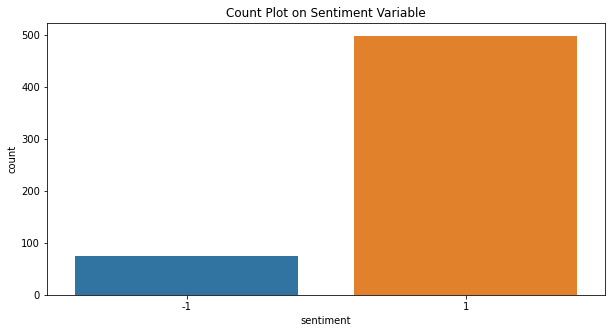

In [59]:
#positive and negative sentiments
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
sn.countplot(tweet['sentiment'])
plt.title('Count Plot on Sentiment Variable')
print("count:\n", tweet['sentiment'].value_counts())

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Probability Distribution of Sentiment Scores')

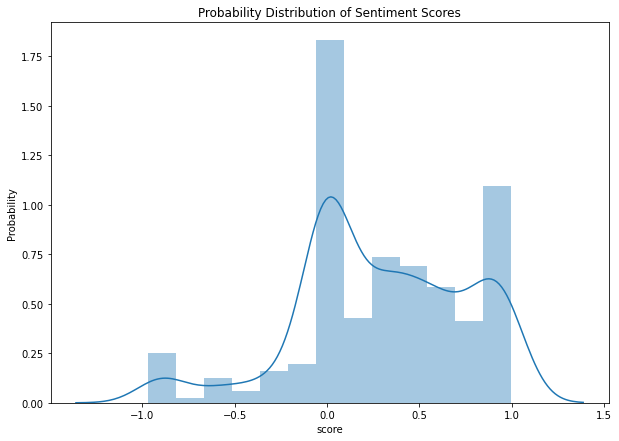

In [61]:
plt.figure(figsize=(10, 7))
sn.distplot(tweet['score'])
plt.ylabel('Probability')
plt.title('Probability Distribution of Sentiment Scores')

Text(0, 0.5, 'Sentiment Scores')

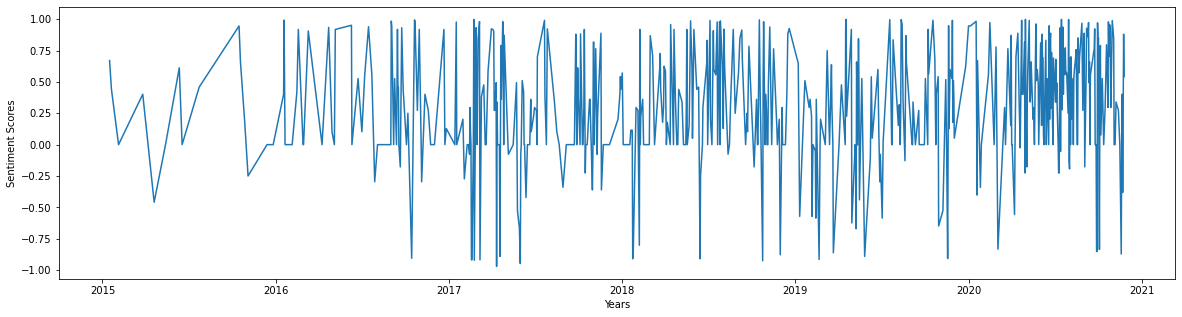

In [63]:
tweet = tweet.set_index('date', drop=False)
plt.figure(figsize=(20, 5))
plt.plot(tweet['score'])
plt.xlabel('Years')
plt.ylabel('Sentiment Scores')

In [74]:
#importing to local machine
from google.colab import files
tweet.to_csv('reliance_tweet.csv') 
files.download('reliance_tweet.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>